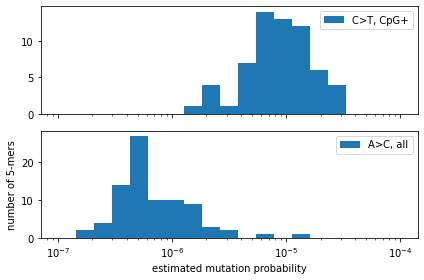

In [4]:
import json 
import numpy as np 
import matplotlib.pyplot as plt 

def kmer_size(kmer_data): 
    for kmer in kmer_data.keys(): 
        return len(kmer)

def plot_mutation_probabilities(model): 
    with open(model, 'r') as fh:
        kmer_data = json.load(fh)['kmer_data']

    CpG_to_T_mutation_probabilities = []
    A_to_C_mutation_probabilities = []
    for data in kmer_data.values(): 
        if data['CpG']: 
            CpG_to_T_mutation_probabilities.append(
                data['estimated_mutation_probabilities']['T']
            )
        if data['REF'] == 'A':
            A_to_C_mutation_probabilities.append(data['estimated_mutation_probabilities']['C'])

    fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True)
    logbins = np.logspace(np.log10(1e-7), np.log10(1e-4) , 20)
    axs[0].hist(CpG_to_T_mutation_probabilities, bins=logbins, label='C>T, CpG+')
    axs[0].legend()
    axs[1].hist(A_to_C_mutation_probabilities, bins=logbins, label='A>C, all')
    axs[1].legend()
    plt.xscale('log')
    plt.xlabel('estimated mutation probability')
    plt.ylabel('number of {}-mers'.format(kmer_size(kmer_data)))

plot_mutation_probabilities('model.json')



Compare the plots above with Fig 2 of Aggarwala and Voight 2016